# CS 109A/AC 209A/STAT 121A Data Science: Homework 5
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

Import libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from IPython.display import display
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Halperin, Keyan]

### Part (b): Course Number

[STAT 121a]

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

One reason PCA is a better choice is that each principal component incorporates information from all of the pixels, while if we only selected a subset of the predictors , we would lose all information about the pixels that we did not include in the model. Another reason PCA is potentially better is that PCA may be more computationally efficient. 

In [310]:
#Load the data
data = np.loadtxt('datasets/dataset_1.txt', delimiter=',')

#Split into predictor and response
x = data[:, :-1]
y = data[:, -1]

#Print shapes of predictor and response arrays
print 'predictor matrix shape:', x.shape
print 'response array shape:', y.shape

predictor matrix shape: (543L, 64L)
response array shape: (543L,)


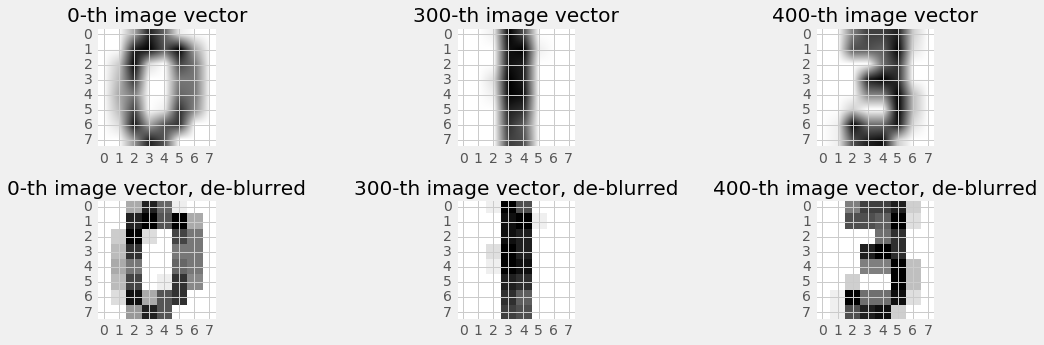

In [342]:
#Plot a couple of images from the dataset
matplotlib.style.use('fivethirtyeight')
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('0-th image vector')
ax[0, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('300-th image vector')
ax[0, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 2].set_title('400-th image vector')

ax[1, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('0-th image vector, de-blurred')
ax[1, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('300-th image vector, de-blurred')
ax[1, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 2].set_title('400-th image vector, de-blurred')

plt.tight_layout()
plt.show()

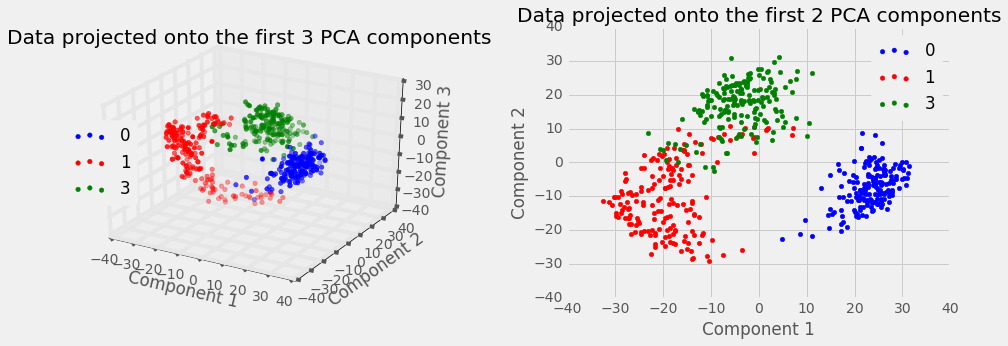

In [355]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('Data projected onto the first 3 PCA components')
ax1.legend(loc=6)

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], c='b', color='b', label='0')
ax2.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], c='r', color='r', label='1')
ax2.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], c='g', color='g', label='3')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('Data projected onto the first 2 PCA components')
ax2.legend(loc=1)

plt.tight_layout(w_pad=2)
plt.show()

By definition, the first 2 or 3 components of PCA captures the top 2 or 3 directions of maximum variation. Luckily in our case, the top 2 and 3 components also captures the separation in the classes! In fact, we realize that using 2 components of the PCA already separates all three classes! Thus using the first two principal components should be sufficient. 

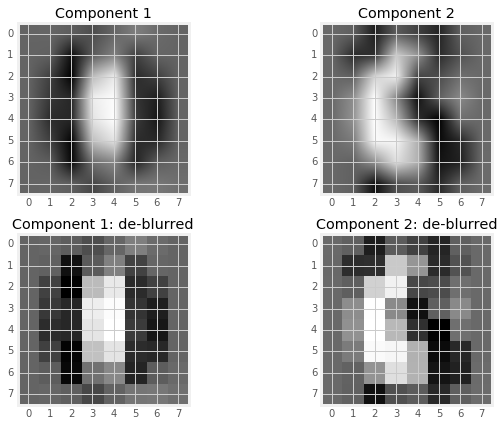

In [313]:

#Display the principal components of PCA as digital images
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
# COMPONENT 1
ax[0, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('Component 1')

# COMPONENT 2
ax[0, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('Component 2')

# COMPONENT 1
ax[1, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('Component 1: de-blurred')

# COMPONENT 2
ax[1, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('Component 2: de-blurred')

plt.tight_layout()
plt.show()

The components of PCA are linear combinations of our original predictors. But in our case, our predictors are pixels, thus, each PCA component is a combination of different pixels - that is, each PCA component is a digital image! 

The first component looks like the digit 0 and the second resembles the digit 3!

And looking at our data projected onto the first two components. In general:

The data points corresponding to 0 are expressed as a combination of a positive multiple of component 1 and a negative multiple of component 2. The data points corresponding to 3 are expressed as a combination of a negative multiple of component 1 and a positive multiple of component 2. The data points corresponding to the digit 1 is expressed as a negative combination of the two components.

This makes sense considering that the first component looks like the digit 0, the second resembles the digit 3, and 1 is neither 0 nor 3.

### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

In [367]:
###Build a classifier to distinguish between 0 and 1

#Remove all instances of class 3
x_binary = x_reduced[y != 3, :]

#Remove all instances of class 3
y_binary = y[y != 3]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg(C=10000000)
logistic_01.fit(x_binary, y_binary)

###Build a classifier to distinguish between 1 and 3

#Remove all instances of class 0
x_binary = x_reduced[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 3
logistic_13 = LogReg(C=10000000)
logistic_13.fit(x_binary, y_binary)

###Build a classifier to distinguish between 0 and 3

#Remove all instances of class 1
x_binary = x_reduced[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 3
logistic_03 = LogReg(C=10000000)
logistic_03.fit(x_binary, y_binary)

#Predict a label for our dataset using each binary classifier
y_pred_01 = logistic_01.predict(x_reduced)
y_pred_13 = logistic_13.predict(x_reduced)
y_pred_03 = logistic_03.predict(x_reduced)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_03 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_13 == 1, 1] += 1

#Votes for 3
y_votes[y_pred_03 == 3, 2] += 1
y_votes[y_pred_13 == 3, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1)

#Relabel class 2 as class 3
y_pred[y_pred == 2] = 3

### Part 1(c). Build a better one
Asses the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numberical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
 
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.

  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

In [368]:
#Accuracy of our predictions
print 'Accuracy of combined model:', round(np.mean(y == y_pred), 5)

Accuracy of combined model: 0.9337


Thus our model seems to do a fairly good job. However, sometimes model accuracy can be deceiving as it does not tell you anything about the false positive rate and the false negative rate. Additionally, even if the model does do a good job, it is possible that another model would do a much better job if for example, the decision boundries between groups appeared to be non-linear. Thus, we can further evaluate the quality of our classifier by visualizing the decision boundaries.  

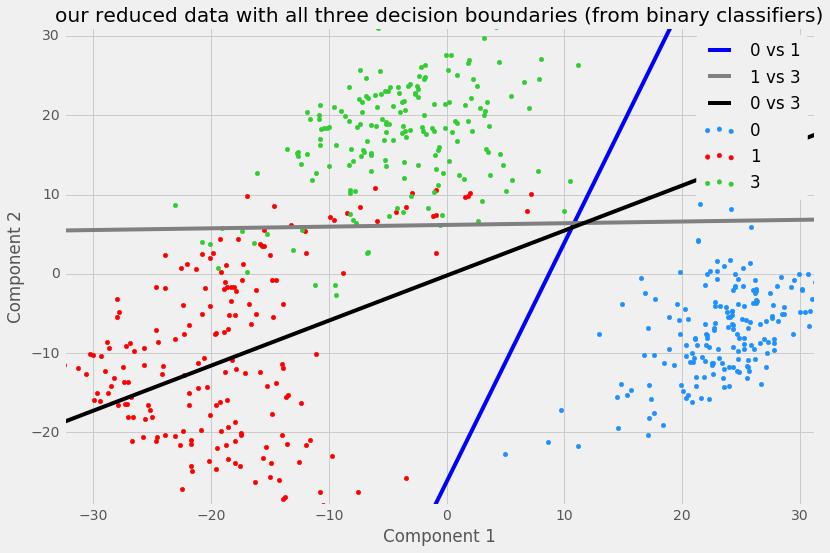

In [364]:
#--------  fit_and_plot_model
# A function to fit a binary LogReg model and visualize it
# Input: 
#      model (LogReg model)
#      ax (axes object for plotting)
#      legend_label (legend label for the plot)

def plot_model(model, ax, legend_label, color):
    #Get the coefficients from logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    
    #Find the max and min horizontal values of our data
    x_0 = np.min(x_reduced[:, 0])
    x_1 = np.max(x_reduced[:, 0])
        
    #Plug int the max and min horizontal values of our data into the equation
    #of the line defined by the coefficients
    y_0 = (-intercept - coef[0] * x_0) / coef[1]
    y_1 = (-intercept - coef[0] * x_1) / coef[1]

    #Plot a line through the pair of points we found above
    ax.plot([x_0, x_1], [y_0, y_1], label=legend_label, color=color)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

#Scatter plot of our data
ax.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], color='dodgerblue', label='0')
ax.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], color='red', label='1')
ax.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], color='limegreen', label='3')

#Plot decision boundaries for 0 vs 1
plot_model(logistic_01, ax, '0 vs 1', 'blue')
#Plot decision boundaries for 1 vs 3
plot_model(logistic_13, ax, '1 vs 3', 'grey')
#Plot decision boundaries for 0 vs 3
plot_model(logistic_03, ax, '0 vs 3', 'black')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_xlim([np.min(x_reduced[:,0]), np.max(x_reduced[:,0])])
ax.set_ylim([np.min(x_reduced[:,1]), np.max(x_reduced[:,1])])
ax.set_title('our reduced data with all three decision boundaries (from binary classifiers)')
ax.legend()
plt.show()

The vizualization of the decision boundries reveal that our model's linear decision boundries do a fairly good job at seperating the clusters for each digit, but there are some problems with the classification of 3 vs. 1 due to the overlap. Thus this vizualization allows us to see potential defficiencies in our model.

However, there are several problems with this approach to classification. One is computational efficiency and complexity. If there were 100 groups for example, you would need to create 100 choose 2 = 4,950 different logistic regression models. Two is the potential for ties. There could be the same number of votes for multiple groups, in which case we would be unable to classify the observation by this method. And three, we are treating each model and each "vote" with equal weight, regardless of how likely the observation is to belong to one group vs. the other. 

As a result a better method would be to create a model for each group, that compared the probability of being in that group vs. the probability of not being in that group. And then we would classify each observation according to which probability was the highest. This method would definitely be superior to the previous one since there would signifcantly fewer logistic regression models, ties are virtually impossible, and we would not be treating each "vote" with equal weight.

## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process" (from Lectures #0, #1, #2):

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  


- Your report should be informative and accessible to a **general audience with no assumed formal training in mathematics, statistics or computer science**.


- The exposition in your report, not including code, visualization and output, should be at least three paragraphs in length (you are free to write more, but you're not required to).

Structure your presentation and exposition like a professional product that can be submitted to a client and or your supervisor at work.

Graphs, charts, and text are spread throughout. Full report is at the end. Text not meant to be read by client are written as comments in code.

In [2]:
#Load the data
data = pd.read_csv('datasets/dataset_2.txt', delimiter=',')
print 'Number of Missing Values \n', data.isnull().sum()
display(data.describe())
display(data.head(10))

Number of Missing Values 
class    0
text     0
dtype: int64


,class,text
count,1382,1382
unique,2,1382
top,Pos,I purchased a 1991 Ford Explorer XLT 4x4 in t...
freq,691,1


,class,text
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...
5,Neg,The Ford Winstar is a car that I would not re...
6,Neg,We bought this van in 1999 after having been...
7,Neg,I bought the Focus wagon for it s cargo space...
8,Neg,You ve probably heard about the giant 2000 Fo...
9,Neg,If you thought that the GMC Chevrolet Suburba...


This dataset includes 1,382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. The data appears to be in good condition with no missing values, but we will explore a little more just to make sure.

Number of Characters 
count     1382.000000
mean      2337.950796
std       2306.555031
min        495.000000
25%       1074.250000
50%       1604.000000
75%       2640.250000
max      21198.000000
dtype: float64

Number of Words 
count    1382.000000
mean      448.583213
std       430.455377
min       101.000000
25%       208.000000
50%       312.500000
75%       505.750000
max      3802.000000
dtype: float64


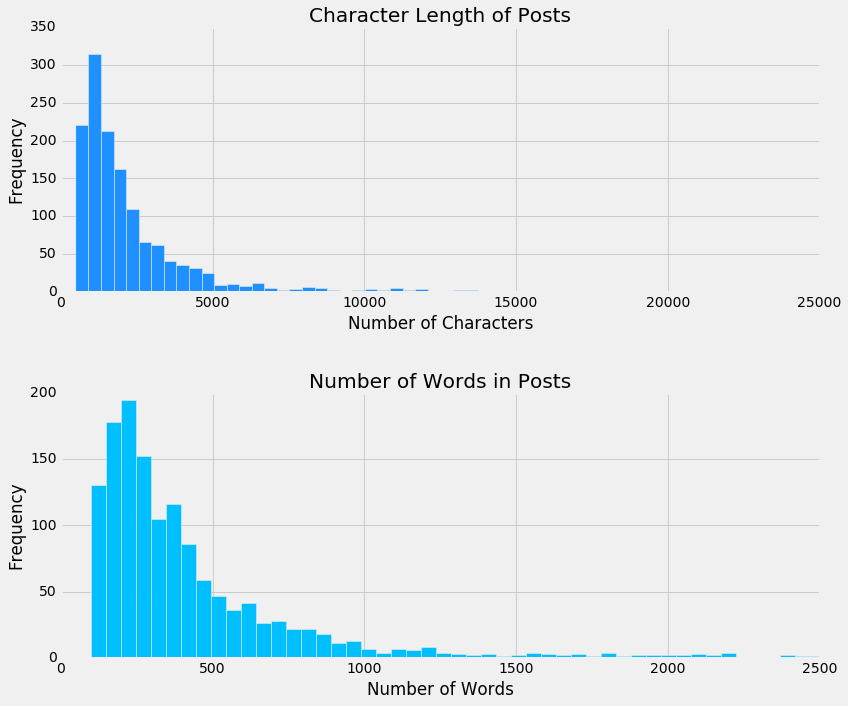

In [3]:
text_length = []
for x in data['text'].values:
     text_length.append(len(x))

word_count = []
for x in data['text'].values:
     word_count.append(len(x.split()))

print 'Number of Characters \n', pd.Series(text_length).describe()
print '\nNumber of Words \n', pd.Series(word_count).describe()

matplotlib.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.hist(text_length, 50, facecolor='dodgerblue', alpha=1)
ax1.set_title('Character Length of Posts')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Frequency')

ax2.hist(word_count, 75, facecolor='deepskyblue', alpha=1)
ax2.set_title('Number of Words in Posts')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Frequency')
plt.xlim(0, 2500)

plt.tight_layout(h_pad=3)
plt.show()  

Looking at the word and character length of each posts, there are no posts with unusual length, which gives us more evidence that the data is in good shape. Typical posts were between about 200 and 500 words long, but there was a noteworthy amount of variation in the length. Some posts were as few as 100 words, and others were as long as 3,800.

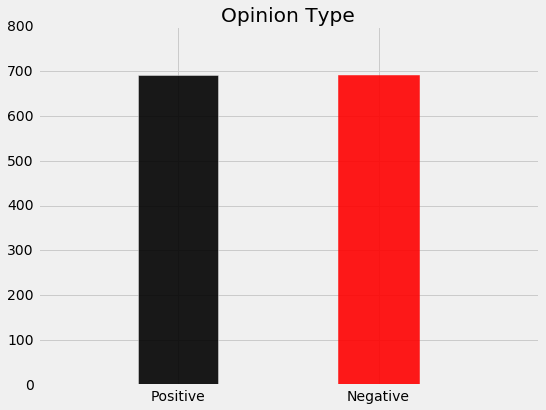

      Count
Pos    691
Neg    691
Name: class, dtype: int64


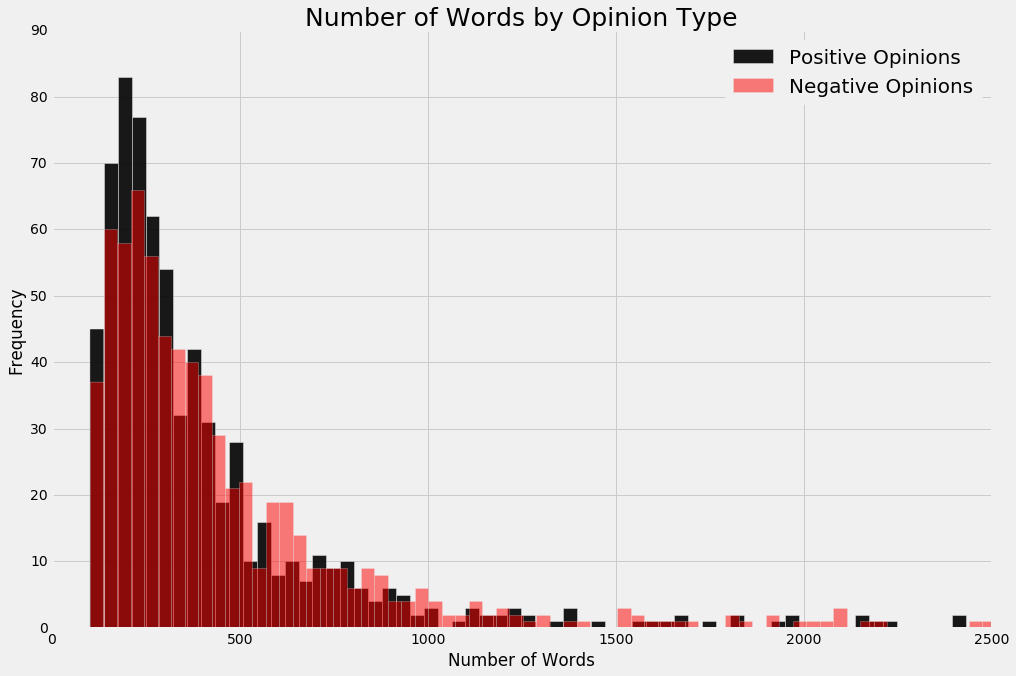


Number of Words among Positive Posts 
count     691.000000
mean      425.671491
std       418.419617
min       101.000000
25%       200.000000
50%       294.000000
75%       475.500000
max      3802.000000
dtype: float64

Number of Words among Negative Posts 
count     691.000000
mean      471.494935
std       441.277435
min       102.000000
25%       220.500000
50%       340.000000
75%       551.000000
max      3697.000000
dtype: float64


In [4]:
op_type = data['class'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
bar = ax.bar([1,2], op_type, width=.4, color='black', alpha=.9)
bar[1].set_color('red')
ax.set_xlim(.5, 3)
ax.set_ylim(0, 800)
ax.set_xticks([1.2, 2.2])
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_title('Opinion Type')
plt.show()

print '      Count\n', op_type

word_count = np.array(word_count)
pos_ind = (data['class'] == 'Pos').nonzero()
neg_ind = (data['class'] == 'Neg').nonzero()

fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.hist(word_count[pos_ind], 100, facecolor='black', alpha=.9, label="Positive Opinions")
ax1.hist(word_count[neg_ind], 100, facecolor='red', alpha=.5, label="Negative Opinions")
ax1.legend(prop={'size':20})
ax1.set_title('Number of Words by Opinion Type', fontsize=25)
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
plt.xlim(0, 2500)

plt.show()  

print '\nNumber of Words among Positive Posts \n', pd.Series(word_count[pos_ind]).describe()
print '\nNumber of Words among Negative Posts \n', pd.Series(word_count[neg_ind]).describe()

The data contains the same number of positive posts (691) as negative posts (691). However, it is worth mentioning that on average, the negative posts were about 50 words longer than the positive posts. This makes sense since in general, customers who are angry tend to have more to say than customers who are content. 

In [5]:
# stop_words='english' ignores the standard list of stop words in English
# We will ignore words that occur fewer than 10 times

vectorizer = CountVectorizer(stop_words='english', min_df=10)
corpus = data['text'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = data['class'].values
vectorizer.get_feature_names()[200:220] 

[u'aforementioned',
 u'afraid',
 u'aftermarket',
 u'afternoon',
 u'age',
 u'aggressive',
 u'ago',
 u'agree',
 u'agreed',
 u'ahead',
 u'air',
 u'airbag',
 u'airbags',
 u'airport',
 u'ajar',
 u'alarm',
 u'albeit',
 u'aligned',
 u'alignment',
 u'allow']

In [6]:
# Although we will use 5-fold cross validation on the training data, we will also withold a small validation set
# in order to construct a confusion matrix
x_train, x_test, y_train, y_test = sk.cross_validation.train_test_split(x, y, test_size=0.1, random_state=1)

In [7]:
#We will try all values of the regularization parameter c from .01, .02, ... , 10.
#And we will asses which one is the best using 5-fold cross validation

c = np.linspace(0.01, 10, 1000) 
logit_ridge = sk.linear_model.LogisticRegressionCV(Cs=c, cv=5, penalty = "l2")
logit_ridge.fit(x_train, y_train)

#print 'Estimated beta1: \n', logit_ridge.coef_
print 'Optimal Value of Regularization Parameter', logit_ridge.C_

Optimal Value of Regularization Parameter [ 0.01]


In [8]:
c = [.01]
logit_ridge = sk.linear_model.LogisticRegressionCV(Cs=c, cv=5, penalty = "l2")
logit_ridge.fit(x_train, y_train)

#Average accuracy over all folds
print 'Average Model Accuracy:', round(logit_ridge.scores_['Pos'].mean(), 5)

Average Model Accuracy: 0.80046


In [10]:
print 'Test Data Accuracy'

pred_y = logit_ridge.predict(x_test)
cm = sk.metrics.confusion_matrix(y_test, pred_y)
print '\nTotal Count'
cm_table = pd.DataFrame.from_items([('Pred Negative', cm[0]), ('Pred Positive', cm[1])],
                                     orient='index', columns=['True Negative', 'True Positve'])
display(cm_table)

cm = sk.metrics.confusion_matrix(y_test, pred_y).astype(float)
cm0 = cm/cm.sum(axis=0, keepdims=True)
print '\nPercentage by Column'
cm0_table = pd.DataFrame.from_items([('Pred Negative', cm0[0]), ('Pred Positive', cm0[1])],
                                      orient='index', columns=['True Negative', 'True Positve'])
display(cm0_table)

cm1 = cm/cm.sum(axis=1, keepdims=True)
print '\nPercentage by Row'
cm1_table = pd.DataFrame.from_items([('Pred Negative', cm1[0]), ('Pred Positive', cm1[1])],
                                      orient='index', columns=['True Negative', 'True Positve'])

display(cm1_table)

print 'Overall Model Accuracy Estimate:', round(logit_ridge.scores_['Pos'].mean(), 5) #Average accuracy over all folds

print 'Model Accuracy on Test Data:', round(logit_ridge.score(x_test, y_test), 5)

Test Data Accuracy

Total Count


,True Negative,True Positve
Pred Negative,52,13
Pred Positive,12,62



Percentage by Column


,True Negative,True Positve
Pred Negative,0.8125,0.173333
Pred Positive,0.1875,0.826667



Percentage by Row


,True Negative,True Positve
Pred Negative,0.800000,0.200000
Pred Positive,0.162162,0.837838


Overall Model Accuracy Estimate: 0.80046
Model Accuracy on Test Data: 0.82014


**Full Report**

This dataset includes 1,382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. Looking at a summary of the data, it appears to be in good condition with no missing values. Looking at the word and character length of each posts, there are no posts with unusual length, which gives us more evidence that the data is indeed in good shape. Typical posts were between about 200 and 500 words long, but there was a noteworthy amount of variation in the length. Some posts were as few as 100 words, and others were as long as 3,800. The data contains the same number of positive posts (691) as negative posts (691). However, it is worth mentioning that on average, negative posts were about 50 words longer than positive posts. This makes sense since in general, customers who are angry tend to have more to say than customers who are content.

We created a model that predicts the opinion type of each post entirely based on the occurance and frequency of every word in the post. However, we only considered words which occurred in the data set at least 10 times since it is difficult to make meaningful inferences about words that occur very infrequently. In addition, we also did not take into consideration filler words like 'a', 'of', and 'the' since we have no reason to believe that they would provide any useful information and their inclusion would make the model unecessarily complex as well. 

The model that we created is able to successfully predict the type of opinion with about 80% accuracy. This is our best estimate of the true overall accuracy of our model. However, we also witheld 10% of the data (139 observations) when creating our model in order to further evaluate the quality of our model. Looking at the 139 observations that we witheld, we correctly predicted the opinions of 114 of them, which gives us an accuracy of 82% for these observations. Among the 64 posts which were negative, we correctly predicted 52 of them as negative, which gives us an 81% accuracy among negative postss. Also, among the 75 posts that were positive, we correctly predicted 62 of them, which gives us 83% accuracy among posts which are positive. Based on this assessment, it is clear that our model does well both among positive posts and negative posts in addition to performing well overall.